In [1]:
!pip install langchain-openai


  Using cached langchain_openai-0.3.34-py3-none-any.whl.metadata (2.4 kB)
  Using cached langchain_core-0.3.77-py3-none-any.whl.metadata (3.2 kB)
Using cached langchain_openai-0.3.34-py3-none-any.whl (75 kB)
Using cached langchain_core-0.3.77-py3-none-any.whl (449 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.76
    Uninstalling langchain-core-0.3.76:
      Successfully uninstalled langchain-core-0.3.76


In [2]:
!pip install langgraph

In [3]:
! pip install gradio

### LangGraph Basics

In [4]:
from dotenv import load_dotenv
from langgraph.graph.message import add_messages
from pydantic import BaseModel
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import gradio as gr
from langchain_openai import ChatOpenAI
import random


In [5]:
load_dotenv(override=True)

True

In [6]:
nouns = ["Cabbages", "Unicorns", "Toasters", "Penguins", "Bananas", "Zombies", "Rainbows", "Eels", "Pickles", "Muffins"]
adjectives = ["outrageous", "smelly", "pedantic", "existential", "moody", "sparkly", "untrustworthy", "sarcastic", "squishy", "haunted"]

### Step 1: Define the State Object

In [7]:
class State(BaseModel):
    messages: Annotated[list,add_messages]

### Step 2: Start the GraphBuilder with this State class

In [8]:
graph_builder = StateGraph(State) 

### Step 3: Create a Node

In [9]:
def our_first_node(old_state:State)-> State:
    reply =f"{random.choice(nouns)} are {random.choice(adjectives)}"
    messages =[{"role":"assistant","content":reply}]

    new_state= State(messages=messages)
    return new_state
graph_builder.add_node("first_node",our_first_node)

### Step 4: Create Edges

In [10]:
graph_builder.add_edge(START,"first_node")
graph_builder.add_edge("first_node",END)


### Step 5: Compile the Graph

In [11]:
graph = graph_builder.compile()

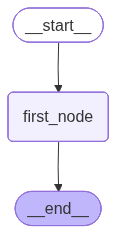

In [12]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
from langchain_core.messages import HumanMessage

def chat(user_input: str, history):
    # Convert user input into a HumanMessage (not a dict/list)
    messages = [HumanMessage(content=user_input)]

    # Create state with proper message objects
    state = State(messages=messages)

    # Run the graph
    result = graph.invoke(state)
    print(result)

    # Return the latest AI response
    return result["messages"][-1].content

gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='9df4b9dd-fb0d-4b1b-9e47-81b9c53675dd'), AIMessage(content='Cabbages are outrageous', additional_kwargs={}, response_metadata={}, id='431e3f5b-0a7e-4cdf-9635-d8e276be4e28')]}
{'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='6d202ca0-4419-4d82-be14-80ec20de7d84'), AIMessage(content='Rainbows are pedantic', additional_kwargs={}, response_metadata={}, id='fc3f49f4-e9d8-4fb3-b294-25e674a5eae6')]}
{'messages': [HumanMessage(content='why', additional_kwargs={}, response_metadata={}, id='e086d1b7-72b0-4d60-91d4-67ef17e8a488'), AIMessage(content='Toasters are pedantic', additional_kwargs={}, response_metadata={}, id='60982fa0-0a3c-4286-b4a1-6887eb9da15c')]}


### Shorter Way

In [16]:
# Define the State class
class State(BaseModel):
    messages: Annotated[list,add_messages]


In [17]:
# Step 2: Start the GraphBuilder With this State class
graph_builder = StateGraph(State)

In [18]:
# Step 3: Create a node
llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot_node(old_state:State)->State:
    response = llm.invoke(old_state.messages)
    new_state = State(messages=[response])
    return new_state

graph_builder.add_node("chatbot",chatbot_node)


In [19]:
# Step 4: Creat Edges
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [20]:
# Step 5: Compile the graph
graph = graph_builder.compile()

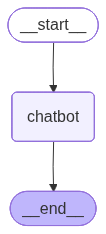

In [21]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
def chat(user_input: str, history):
    # Convert user input into a HumanMessage (not a dict/list)
    messages = [HumanMessage(content=user_input)]

    # Create state with proper message objects
    state = State(messages=messages)

    # Run the graph
    result = graph.invoke(state)
    print(result)

    # Return the latest AI response
    return result["messages"][-1].content

gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='2e4cbaac-287d-4b7c-9833-5c1edb147934'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CLvTwgGP3CgrOaFutENL4F10bie9e', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--e346da25-9b51-437e-8123-fcee73693971-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
{'messages': [HumanMessage(content='Wha